# Proyecto 11: Transformación de Datos

## Por Ricardo A. Del Río Guzmán

## Parte 0 - Preparación y Configuración


### Conexión con Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Importación de Librerías


In [0]:
!pip install pyunpack
!pip install patool

  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=f678f84bab89494b3f63a6b0e98785617b9f785cf0a3f6828a9e233b5d882b8e
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack
     |████████████████████████████████| 81kB 3.4MB/s 


In [0]:
# # Necesarios para el funcionamiento adecuado del notebook:
# import ipywidgets
# import traitlets

# Estruturas de datos:
import pandas as pd
import numpy as np

# Visuaizaciones:
import matplotlib.pyplot as plt
import seaborn as sns

# Manejo de archivos:
from pyunpack import Archive
from os import getcwd, chdir, listdir, path, mkdir
import glob

# Estadpistica y datos:
from scipy import stats


# import datetime
# from scipy.stats import trim_mean as tm

# # Conecciones y consumo de APIs
# import requests
# import psycopg2

In [0]:
# Librerías Propias:
chdir('/content/drive/My Drive/__libreras_propias')
%run info_tables2.0.ipynb
%run exploratory_analysis.ipynb
chdir('/content/drive/My Drive/Proyecto 11')

́
{'cat_id': 1, 'col_id': 2, 'org_name': 'Female', 'name': 'mujer', 'num': 2, 'descr': 'el sexo biológico de la persona es mujer'}



dict_values([1, 2, 'Female', 'mujer', 2, 'el sexo biológico de la persona es mujer'])


1, 2, Female, mujer, 2, el sexo biológico de la persona es mujer
1;;2;;Female;;mujer;;2;;el sexo biológico de la persona es mujer
1;;1;;Female;;mujer;;1;;el sexo biológico es femenino
2;;1;;Male;;hombre;;2;;el sexo biológico es masculino
3;;1;;Both;;hermafrodita;;2;;el sexo biológico es hermafrodita

1, 1, Female, mujer, 1, el sexo biológico es femenino
2, 1, Male, hombre, 2, el sexo biológico es masculino
3, 1, Both, hermafrodita, 2, el sexo biológico es hermafrodita


0;;Name;;CAT_NO_ORD;;el nombre de la persona;;nombre

### Definiciones de Clases, Funciones y Variables

#### Variables

In [0]:

# Variables de rutas y nombres de archivos
PATH = r'{0}content{0}drive{0}My Drive{0}Proyecto 11'.format(path.sep)
CSV_DIRS = ('50k_7r_csv_data', 'all_7r_csv_data', '50k_chile_csv_data')
FILES = ('7r_ricardo_del_rio.rar', 'Censo_7r.rar', 'censo_chile_sample.rar')

# Variables DataBaseInfo:
DATABASEINFO_NAME = 'Censo 7ma Region'

# Variables base de datos:
DB_NAME = 'censo_chile_7r'
HOST = 'localhost'
USER = 'postgres'
PSS = 'calei1234'
DB_CREDENTIALS = (DB_NAME, HOST, USER, PSS)



In [0]:
# Queries:

# CREATE_ = \
# '''CREATE TABLE {}(
# code TEXT not null unique,
# mag FLOAT not null,
# alert TEXT,
# place TEXT,
# sig INTEGER,
# tsunami INTEGER,
# title TEXT,
# year INTEGER,
# month INTEGER,
# day INTEGER,
# hour INTEGER,
# minute INTEGER,
# second INTEGER,
# in_chile INTEGER,
# mag_gt_6 INTEGER
# );'''

# CREATE_ = 
# CREATE_ = 

# LOAD_ =\
# '''COPY tabla
# (code, mag, alert, place, sig, tsunami, title, year, month, day, hour, minute, 
# second, in_chile, mag_gt_6)
# FROM '/home/c3-3/Documentos/Proyecto 9/earthquakes_mag6_{y}.csv' DELIMITERS ';' csv header;'''

#### Funciones para Extracción de Datos


In [0]:
# if not INPUT_CSV_DIR in listdir():
#   mkdir(INPUT_CSV_DIR)
#   Archive(path.join(PATH, glob.glob('*.rar')[0]))\
#           .extractall(INPUT_CSV_DIR)
#   print('Se extrajeron los archivos del archivo comprimido.')
# else:
#   print('Ya habían sido extraídos los archivos de la carpeta comprimida.')


def decompress_file(file_name, output_dir):
  '''
  This function extract the files of the compressed 'file_name' folder
  and save them in the 'output_dir' directory.
  '''
  if not output_dir in listdir():
    mkdir(output_dir)
    Archive(path.join(PATH, file_name))\
            .extractall(output_dir)
    print(f'Se extrajeron los archivos de la carpeta comprimida {file_name}.')
  else:
    print(f'Ya habían sido extraídos los archivos de la carpeta comprimida {file_name}.')

#### Funciones para Creación de Gráficos

In [0]:
def save_graph(name):
  org_dir = getcwd()
  chdir('/content/drive/My Drive/Proyecto 06/Imágenes')
  if not (name in listdir()):
    plt.savefig(name, bbox_inches="tight")
  chdir(org_dir)

def save_graph2(name):
  if not (name in listdir()):
    fig.savefig(name, bbox_inches="tight")

# def graph_p(hor_values, ver_values, g_type=0, 
#           hor_label='', ver_label='', title='', 
#           show_save=True, first=True, image=False):
#   options = {0: plt.plot, 1: plt.bar}
#   # Creación y configuración del gráfico:
#   if first:
#     fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
#                     edgecolor='k')
#     plt.tick_params(axis ='x', rotation = 60) 
#   options[g_type](hor_values, ver_values, color ='tomato', linewidth=3)
#   plt.xlabel(hor_label)
#   plt.ylabel(ver_label)
#   plt.title(title)
#   if image:
#     img = plt.imread("mapa-horizontal-completo.png")
#     plt.imshow(img)
#   # Se guarda el gráfico en el drive y se muestra:
#   if show_save:
#     save_graph(title.lower().replace(' ','_') + '.jpg')
    
#     plt.close() 


def analisis(db, name):
  print
  print('La base de datos "{}" tiene {} filas y {} columnas.\n'.format(name, db.shape[0], db.shape[1]))
  display(db.head(3))
  display(db.describe())
  display(db.describe().sum(axis=1))
  print('\n'+ '_'*200 + '\n')

def correlation_map(dataframe, titulo, annot=True):
  corr_pd = dataframe.corr()
  # Se filtran los valores, dejando solo los con una correlación mayor 
  # corr_pd = corr_pd[abs(corr_pd) >= 0.05]
  corr_pd = corr_pd[abs(corr_pd) >= 0.3]

  plt.figure(figsize=(15, 6))
  mask = np.zeros_like(corr_pd, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  sns.heatmap(corr_pd,annot=annot, mask=mask, cmap='RdBu_r', center=0) 
  plt.title(titulo, fontsize=20)
  # save_graph(modify_text(titulo))
  plt.show()
  print()

def boxplot_graph(column, name, sec=False):
  fig = plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='whitesmoke', 
                   edgecolor='k')
  plt.boxplot(column.values)
  plt.title('Boxplot de Columna ' + name, fontsize=20)
  if sec:
    # save_graph(modify_text('Boxplot limpio de Columna ' + name))
    pass
  else:
    # save_graph(modify_text('Boxplot de Columna ' + name))
    pass
  plt.show()


def null_graph(db, name):
  fig = plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='whitesmoke', 
                    edgecolor='k')
  sns.heatmap(db.isnull(), cbar=False)
  plt.title('Valores Nulos en "{}"'.format(name), fontsize=20)
  # save_graph(modify_text('Valores Nulos en "{}"'.format(credit.name)))
  plt.show()
  display(db.info())
  print()

def outliers_graph(column, col_name, sec = False):
  # Cut the window in 2 parts
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      gridspec_kw={"height_ratios": (.15, .85)})

  plt.title('Outliers de "{}"'.format(col_name.replace('_',' ').title()))
  
  # Add a graph in each part
  sns.boxplot(column, ax=ax_box)
  sns.distplot(column, ax=ax_hist)
  
  # Remove x axis name for the boxplot
  ax_box.set(xlabel='')

  # if sec:
  #   save_graph(modify_text('Sin Outliers de "{}"'\
  #                          .format(col_name.replace('_',' ').title())))
  # elif not sec:
  #   save_graph(modify_text('Outliers de "{}"'\
  #                          .format(col_name.replace('_',' ').title())))
  
  plt.show()
  print()

#### Funciones para Modificación de Texto

In [0]:
def char(c):
  '''
  Cambia los carácteres que no son alfanuméricos por un guión bajo.
  '''
  if c.isalnum():
    return c
  return '_'


def modify_text(text, lenght=25):
  '''
  Convierte un texto a "snake_case" con un máximo de carácteres dado.
  '''
  return ''.join(map(char, text)).lower()[:lenght+1]

def pretty(txt):
  '''
  Toma un texto en "snake_case" y lo transforma a "Title Case"
  '''
  return txt.replace('_',' ').title()

#### Funciones Para Reemplazar Valores

In [0]:
def replace(org_values, old_values, new_values):
  '''
  org_values: Estructura de datos iterable y unidimensional con los datos 
    originales.
  old_values: Valor único o lista de valores que se desean reemplazar de la 
    estructura 'org_values'.
  new_values: Valores por los que se desea reemplazar cada uno de los valores
    de 'old_values'. La cantidad de elementos en ambos iterables deben 
    coincidir.

  Está función retorna una estructura de datos en la que fueron reemplazados los
  valores indicados de la estructura original por los valores respectivos
  '''

  


#### Funciones para Queries a Bases de Datos

In [0]:
# Conexión con la base de datos:

def start_conection(name, host, user, password):
  '''
  Esta función decoradora se encargará de iniciar la conexión con la base de 
  datos cada vez que sea necesario para su modificación.
  Generará el objeto cursor que será entregado a cada función que modifique
  la base de datos.
  Posee dos capas decoradoras para poder recibir parámetros.

  Modo de uso:

  @start_conection(*DB_CREDENTIALS)
  def function():
  pass
  '''
  def func_decorator(func):
    def new_function(*args, **kwargs):
      with psycopg2.connect(dbname=name, host=host,
                              user=user, password=password) as conn:
        with conn.cursor() as cursor:
          return func(cursor, *args, **kwargs)
    return new_function
  return func_decorator


@start_conection(*DB_CREDENTIALS)
def execute_querys(cursor, *args, fetchdata=True):
  '''
  Ejecuta en la base de datos todos los querys que se entreguen.
  Retorna una lista de los dataframes obtenidos con cada query.
  Si solo se ejecuta una query, retorna ese único daa frame
  '''
  dfs = []
  for query in args:
    # Se ejecuta la query:
    cursor.execute(query)
    if fetchdata:
      # Se recupera la info:
      data = cursor.fetchall()
      # Se guarda la info en un DF y almacena en una lista:
      dfs.append(pd.DataFrame(list(data), 
                              columns=[x[0] for x in cursor.description]))
  if fetchdata:
    # Se retorna la lista con todos los data frames:
    if len(dfs) == 1:
      return dfs[0]
    return dfs


### Formatos y Configuraciones

In [0]:
# Carga una versión anterior de matplotlib, para que los gráficos heatmaps no
# se corten en la base:
!pip install matplotlib==3.1.0

     |████████████████████████████████| 13.1MB 320kB/s 
ERROR: plotnine 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: mizani 0.6.0 has requirement matplotlib>=3.1.1, but you'll have matplotlib 3.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.2
    Uninstalling matplotlib-3.1.2:
      Successfully uninstalled matplotlib-3.1.2


In [0]:
# Formato de los gráficos:
sns.set(style='whitegrid')

### Descompresión de los Archivos

In [0]:
for tuple_file in zip(FILES, CSV_DIRS):
  decompress_file(*tuple_file)

## OJO EL SEGUNDO ARCHIVO AL DESCOMPRIMIRLO GENERA UNA CARPETA
## HAY QUE MODER ESOS ARCHIVOS A LA CARPETA SUPERIOR PARA QUE TODO FUNCIONE

Ya habían sido extraídos los archivos de la carpeta comprimida 7r_ricardo_del_rio.rar.
Ya habían sido extraídos los archivos de la carpeta comprimida Censo_7r.rar.
Ya habían sido extraídos los archivos de la carpeta comprimida censo_chile_sample.rar.


### Links de referencia y de utilidad:

https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b
https://medium.com/dunder-data/from-pandas-to-scikit-learn-a-new-exciting-workflow-e88e2271ef62
https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
https://es.wikipedia.org/wiki/Esquema_en_estrella
https://www.guru99.com/star-snowflake-data-warehousing.html



## Parte 1 - Algunas librerías, funciones y principios de utilidad

### 1) Comentario de Aplicación de Nuevas Funcionalidades

Comente, a partir del punto b2, qué funcionalidades les llamaron la atención y por tanto instalaron en su entorno. Ya finalizado todo el proyecto, indique qué herramientas indicadas en b1 y b2 utilizó y de qué forma.


**COMENTARIOS**

Debido a la comodidad de tener los archivos en la nube y poder trabajar en ellos desde cualquier lugar opté por trabajar con Google Colaboratory, por lo que hubo algunas funcionalidades de Jupyter Notebook que no pude probar.

De todos modos Google Colaboratory ya tiene incluidas algunas de las funcionalidades adicionales de Jupyter, dentro de las cuales la que más me gusta es el autoguardado de los cambios en el archivo.

## Parte 2 - Carga de Datos

### 2) Carga de Múltiples Archivos 

Investigue sobre el uso de la librería glob, para la lectura de múltiples archivos, y utilicela para la carga de datos. 

Hint: Podría serle de utilidad también el utilizar la librería os.

In [0]:
def same_columns(directory):
  '''
  Return True if all csv files of the directory have the same columns.
  False otherwise.
  '''
  lst = []
  for file in listdir(directory):
    lst.append(list(pd.read_csv(directory + path.sep + file, sep=';',
                              engine='python').columns))
  return lst[1:] == lst[:-1]


# # Se corrobora que todos los csv tienen las mismas columnas:
# lst = []
# for file in listdir(INPUT_CSV_DIR):
#   lst.append(list(pd.read_csv(INPUT_CSV_DIR + path.sep + file, sep=';').columns))

# lst[1:] == lst[:-1]

In [0]:
def df_from_multiple_csv(directory): 
  '''
  Concats the dataframes of all the csv files in the directory if all have the 
  same columns.
  '''
  if same_columns(directory):
    print('Todos los archivos de {} poseen las mismas columnas'\
          .format(directory))
    # Se genera un iterador con todos los archivos a cargar:
    all_files = glob.iglob(path.join(PATH, directory, "*.csv"))
    # Se convierte cada archivo en un data frame:
    df_from_each_file = (pd.read_csv(f, sep=';') for f in all_files)
    # Se concatenan todos los dataframes:
    return pd.concat(df_from_each_file, ignore_index=True)
  else:
    print('Los archivos en {} poseen distintas columnas  no se pueden unir.'\
          .format(directory))


# # Se genera un iterador con todos los archivos a cargar:
# all_files = glob.iglob(path.join(PATH, INPUT_CSV_DIR, "*.csv"))
# # Se convierte cada archivo en un data frame:
# df_from_each_file = (pd.read_csv(f, sep=';') for f in all_files)
# # Se concatenan todos los dataframes:
# df_region7   = pd.concat(df_from_each_file, ignore_index=True)
# df_region7

In [0]:
# Se crean los DFs a partis de los archivos:
df_region7 = df_from_multiple_csv(CSV_DIRS[0])
df_all_region7 = df_from_multiple_csv(CSV_DIRS[1])
df_chile = df_from_multiple_csv(CSV_DIRS[2])

# Se muestran los DataFrames:
display(df_region7.head(3))
print(df_region7.shape)
display(df_all_region7.head(3))
print(df_all_region7.shape)
display(df_chile.head(3))
print(df_chile.shape)

Todos los archivos de 50k_7r_csv_data poseen las mismas columnas
Todos los archivos de all_7r_csv_data poseen las mismas columnas
Todos los archivos de 50k_chile_csv_data poseen las mismas columnas


,Unnamed: 0,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,P09,P10,P10COMUNA,P10PAIS,P11,P11COMUNA,P11PAIS,P12,P12COMUNA,P12PAIS,P12A_LLEGADA,P12A_TRAMO,P13,P14,P15,P15A,P16,P16A,P16A_OTRO,P17,P18,P19,P20,P21M,P21A,P10PAIS_GRUPO,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R,REGION_PROVINCIA_COMUNA
0,12391546,99.0,1.0,999.0,14281.0,159.0,1.0,2.0,2.0,2.0,57.0,1.0,98.0,998.0,2.0,98.0,998.0,2.0,7308.0,998.0,9998.0,98.0,2.0,3.0,7.0,2.0,2.0,98.0,98.0,6.0,98,NaN,3.0,12.0,1993.0,998.0,998.0,998.0,11.0,98.0,7.0,73.0,7301.0,98.0,98.0,7308.0,7_73_7301
1,12806602,13.0,1.0,6.0,2848.0,48.0,1.0,1.0,1.0,2.0,68.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,4.0,7.0,1.0,2.0,98.0,98.0,8.0,98,3.0,3.0,9.0,1977.0,998.0,998.0,998.0,12.0,98.0,7.0,71.0,7101.0,98.0,98.0,98.0,7_71_7101
2,11935619,4.0,1.0,1.0,10801.0,613.0,1.0,4.0,7.0,1.0,75.0,3.0,13124.0,998.0,3.0,13124.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,2.0,9.0,2.0,2.0,98.0,98.0,1.0,H,98.0,98.0,98.0,9998.0,998.0,998.0,998.0,8.0,98.0,7.0,74.0,7404.0,13124.0,13124.0,98.0,7_74_7404


(50000, 47)


,Unnamed: 0,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,P09,P10,P10COMUNA,P10PAIS,P11,P11COMUNA,P11PAIS,P12,P12COMUNA,P12PAIS,P12A_LLEGADA,P12A_TRAMO,P13,P14,P15,P15A,P16,P16A,P16A_OTRO,P17,P18,P19,P20,P21M,P21A,P10PAIS_GRUPO,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R
0,11816750,7,74,7408,1,1,1,7739,1,1,1,1,1,57,1,98,998,2,98,998,1,98,998,9998,98,2,4,7,1,2,98,98,1,P,98,98,98,9998,998,998,998,12,98,7,74,7408,98,98,98
1,11816751,7,74,7408,1,1,1,7739,1,1,2,2,2,54,1,98,998,2,98,998,1,98,998,9998,98,2,5,8,1,2,98,98,1,Q,2,2,8,1991,998,998,998,12,98,7,74,7408,98,98,98
2,11816752,7,74,7408,1,1,1,7739,1,1,3,5,2,25,1,98,998,3,7101,998,1,98,998,9998,98,1,3,12,2,2,98,98,5,98,0,98,98,9998,998,998,998,15,98,7,74,7408,98,7101,98


(1044950, 49)


,Unnamed: 0,DC,AREA,ZC_LOC,ID_ZONA_LOC,NVIV,NHOGAR,PERSONAN,P07,P08,P09,P10,P10COMUNA,P10PAIS,P11,P11COMUNA,P11PAIS,P12,P12COMUNA,P12PAIS,P12A_LLEGADA,P12A_TRAMO,P13,P14,P15,P15A,P16,P16A,P16A_OTRO,P17,P18,P19,P20,P21M,P21A,P10PAIS_GRUPO,P11PAIS_GRUPO,P12PAIS_GRUPO,ESCOLARIDAD,P16A_GRUPO,REGION_15R,PROVINCIA_15R,COMUNA_15R,P10COMUNA_15R,P11COMUNA_15R,P12COMUNA_15R,REGION_PROVINCIA_COMUNA
0,9234054,4.0,1.0,3.0,1676.0,143.0,1.0,1.0,1.0,1.0,24.0,1.0,98.0,998.0,2.0,98.0,998.0,2.0,8207.0,998.0,9998.0,98.0,2.0,2.0,7.0,2.0,1.0,1.0,98.0,1.0,Z,NaN,98.0,98.0,9998.0,998.0,998.0,998.0,10.0,1.0,9.0,91.0,9112.0,98.0,98.0,8207.0,9_91_9112
1,13815309,3.0,1.0,2.0,13973.0,854.0,1.0,1.0,1.0,2.0,40.0,1.0,98.0,998.0,3.0,5801.0,998.0,2.0,5801.0,998.0,9998.0,98.0,2.0,4.0,7.0,1.0,2.0,98.0,98.0,1.0,P,2.0,2.0,11.0,2003.0,998.0,998.0,998.0,12.0,98.0,5.0,58.0,5804.0,98.0,5801.0,5801.0,5_58_5804
2,12993993,11.0,2.0,26.0,13057.0,304.0,1.0,2.0,2.0,2.0,38.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,4.0,8.0,1.0,2.0,98.0,98.0,1.0,A,2.0,2.0,4.0,2007.0,998.0,998.0,998.0,12.0,98.0,6.0,63.0,6303.0,98.0,98.0,98.0,6_63_6303


(50000, 47)


In [0]:
import sys
sys.getsizeof(df_chile)

24479623

### *) Carga de Datos de Columnas y Categorías

In [0]:
# Se define la ubicación donde se guardarán los datos de las columnas y 
# categorías:
DataBaseInfo.set_dir(PATH)
# Se carga la información de las columnas y categorías de cada tabla:
info_region7 = DataBaseInfo(DATABASEINFO_NAME)

In [0]:
# Se cargan los datos de las columnas y categorías (region 50k):
df_region7 = info_region7.update_synchronize(df_region7)
display(df_region7.head(3))
# Se cargan los datos de las columnas y categorías (region Todos):
df_all_region7 = info_region7.update_synchronize(df_all_region7)
display(df_all_region7.head(3))
# Se cargan los datos de las columnas y categorías (Chile 50k):
df_chile = info_region7.update_synchronize(df_chile)
display(df_chile.head(3))

set()


,id,distrito,area,zona_localidad,id_zona_localidad,num_vivienda,num_hogar,num_persona,parentezco,sexo,edad,res_habitual,comuna_res_hab,pais_res_hab,residencia_5años,comuna_res_5a,pais_res_5a,lugar_nacimiento,comuna_nac,pais_nacimiento,año_llegada_pais,periodo_llegada_pais,asiste_educ_formal,curso_mas_alto_aprob,nivel_mas_alto_aprob,nivel_completado,pueblo_originario,pueblo_org_selec,otro_pueblo_org_selec,trabajo_sem_pasada,rama_act_econ,hijes_nac_vives,hijes_vives,mes_nac_ult_hije,año_nac_ult_hije,pais_res_hab_grupo,pais_res_5a_grupo,pais_nac_grupo,escolaridad,pueblo_originario_grupo,region_15r,provincia_15r,comuna_15r,comuna_res_hab_15r,comuna_res_5a_15r,comuna_nac_15r,region_provincia_comuna
0,12391546,99.0,1.0,999.0,14281.0,159.0,1.0,2.0,2.0,2.0,57.0,1.0,98.0,998.0,2.0,98.0,998.0,2.0,7308.0,998.0,9998.0,98.0,2.0,3.0,7.0,2.0,2.0,98.0,98.0,6.0,98,NaN,3.0,12.0,1993.0,998.0,998.0,998.0,11.0,98.0,7.0,73.0,7301.0,98.0,98.0,7308.0,7_73_7301
1,12806602,13.0,1.0,6.0,2848.0,48.0,1.0,1.0,1.0,2.0,68.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,4.0,7.0,1.0,2.0,98.0,98.0,8.0,98,3.0,3.0,9.0,1977.0,998.0,998.0,998.0,12.0,98.0,7.0,71.0,7101.0,98.0,98.0,98.0,7_71_7101
2,11935619,4.0,1.0,1.0,10801.0,613.0,1.0,4.0,7.0,1.0,75.0,3.0,13124.0,998.0,3.0,13124.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,2.0,9.0,2.0,2.0,98.0,98.0,1.0,H,98.0,98.0,98.0,9998.0,998.0,998.0,998.0,8.0,98.0,7.0,74.0,7404.0,13124.0,13124.0,98.0,7_74_7404


set()


,id,region,provincia,comuna,distrito,area,zona_localidad,id_zona_localidad,num_vivienda,num_hogar,num_persona,parentezco,sexo,edad,res_habitual,comuna_res_hab,pais_res_hab,residencia_5años,comuna_res_5a,pais_res_5a,lugar_nacimiento,comuna_nac,pais_nacimiento,año_llegada_pais,periodo_llegada_pais,asiste_educ_formal,curso_mas_alto_aprob,nivel_mas_alto_aprob,nivel_completado,pueblo_originario,pueblo_org_selec,otro_pueblo_org_selec,trabajo_sem_pasada,rama_act_econ,hijes_nac_vives,hijes_vives,mes_nac_ult_hije,año_nac_ult_hije,pais_res_hab_grupo,pais_res_5a_grupo,pais_nac_grupo,escolaridad,pueblo_originario_grupo,region_15r,provincia_15r,comuna_15r,comuna_res_hab_15r,comuna_res_5a_15r,comuna_nac_15r
0,11816750,7,74,7408,1,1,1,7739,1,1,1,1,1,57,1,98,998,2,98,998,1,98,998,9998,98,2,4,7,1,2,98,98,1,P,98,98,98,9998,998,998,998,12,98,7,74,7408,98,98,98
1,11816751,7,74,7408,1,1,1,7739,1,1,2,2,2,54,1,98,998,2,98,998,1,98,998,9998,98,2,5,8,1,2,98,98,1,Q,2,2,8,1991,998,998,998,12,98,7,74,7408,98,98,98
2,11816752,7,74,7408,1,1,1,7739,1,1,3,5,2,25,1,98,998,3,7101,998,1,98,998,9998,98,1,3,12,2,2,98,98,5,98,0,98,98,9998,998,998,998,15,98,7,74,7408,98,7101,98


set()


,id,distrito,area,zona_localidad,id_zona_localidad,num_vivienda,num_hogar,num_persona,parentezco,sexo,edad,res_habitual,comuna_res_hab,pais_res_hab,residencia_5años,comuna_res_5a,pais_res_5a,lugar_nacimiento,comuna_nac,pais_nacimiento,año_llegada_pais,periodo_llegada_pais,asiste_educ_formal,curso_mas_alto_aprob,nivel_mas_alto_aprob,nivel_completado,pueblo_originario,pueblo_org_selec,otro_pueblo_org_selec,trabajo_sem_pasada,rama_act_econ,hijes_nac_vives,hijes_vives,mes_nac_ult_hije,año_nac_ult_hije,pais_res_hab_grupo,pais_res_5a_grupo,pais_nac_grupo,escolaridad,pueblo_originario_grupo,region_15r,provincia_15r,comuna_15r,comuna_res_hab_15r,comuna_res_5a_15r,comuna_nac_15r,region_provincia_comuna
0,9234054,4.0,1.0,3.0,1676.0,143.0,1.0,1.0,1.0,1.0,24.0,1.0,98.0,998.0,2.0,98.0,998.0,2.0,8207.0,998.0,9998.0,98.0,2.0,2.0,7.0,2.0,1.0,1.0,98.0,1.0,Z,NaN,98.0,98.0,9998.0,998.0,998.0,998.0,10.0,1.0,9.0,91.0,9112.0,98.0,98.0,8207.0,9_91_9112
1,13815309,3.0,1.0,2.0,13973.0,854.0,1.0,1.0,1.0,2.0,40.0,1.0,98.0,998.0,3.0,5801.0,998.0,2.0,5801.0,998.0,9998.0,98.0,2.0,4.0,7.0,1.0,2.0,98.0,98.0,1.0,P,2.0,2.0,11.0,2003.0,998.0,998.0,998.0,12.0,98.0,5.0,58.0,5804.0,98.0,5801.0,5801.0,5_58_5804
2,12993993,11.0,2.0,26.0,13057.0,304.0,1.0,2.0,2.0,2.0,38.0,1.0,98.0,998.0,2.0,98.0,998.0,1.0,98.0,998.0,9998.0,98.0,2.0,4.0,8.0,1.0,2.0,98.0,98.0,1.0,A,2.0,2.0,4.0,2007.0,998.0,998.0,998.0,12.0,98.0,6.0,63.0,6303.0,98.0,98.0,98.0,6_63_6303


## Parte 3 - Preprocesamiento y Transformación de Datos

### 3) Tratamiento de Nulos

Para el archivo de datos asignados realice una identificación de los datos nulos. Además, explique el tratamiento de estos detalladamente. Esto quiere decir, en caso de que tome la determinación de mantener, eliminar o imputar estos datos, indique el procedimiento que utilizó y el porqué de su decisión.
Indique el tamaño del DataFrame previo y posterior a la realización de este punto.

Hint: utilice el pdf adjunto al anunciado para identificar los valores utilizados para indicar qué datos están asignados como ‘missing’ o ‘no aplica’. Recuerde que no siempre los datos NaN vienen ya codificados como tales en una base de datos.


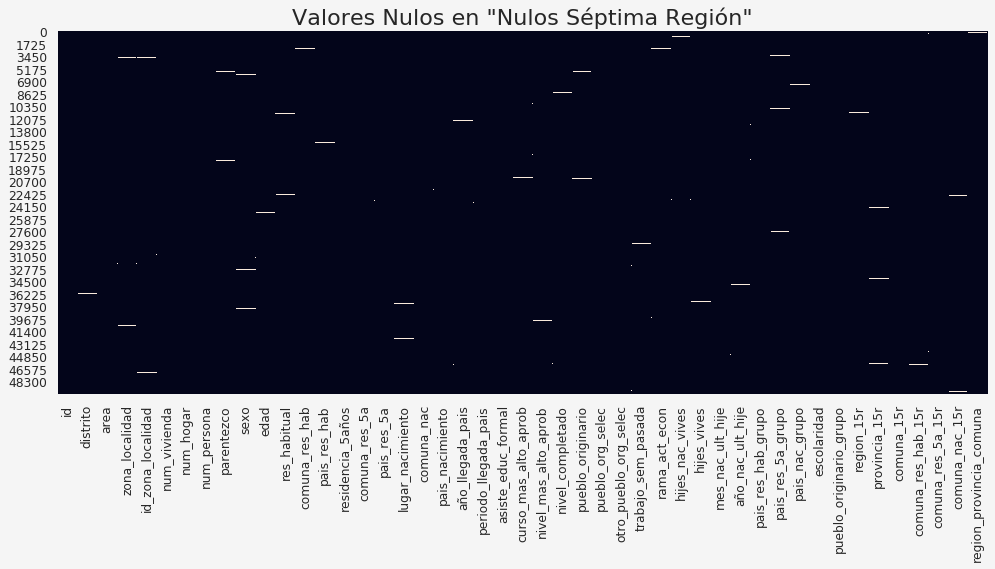

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
id                         50000 non-null int64
distrito                   49870 non-null float64
area                       49863 non-null float64
zona_localidad             49877 non-null float64
id_zona_localidad          49878 non-null float64
num_vivienda               49892 non-null float64
num_hogar                  49885 non-null float64
num_persona                49870 non-null float64
parentezco                 49870 non-null float64
sexo                       49884 non-null float64
edad                       49872 non-null float64
res_habitual               49875 non-null float64
comuna_res_hab             49864 non-null float64
pais_res_hab               49883 non-null float64
residencia_5años           49852 non-null float64
comuna_res_5a              49881 non-null float64
pais_res_5a                49871 non-null float64
lugar_nacimiento           49869 non-null f

None

In [0]:
null_graph(df_region7, 'Nulos Séptima Región')

In [0]:
df_region7.describe()

,id,distrito,area,zona_localidad,id_zona_localidad,num_vivienda,num_hogar,num_persona,parentezco,sexo,edad,res_habitual,comuna_res_hab,pais_res_hab,residencia_5años,comuna_res_5a,pais_res_5a,lugar_nacimiento,comuna_nac,pais_nacimiento,año_llegada_pais,periodo_llegada_pais,asiste_educ_formal,curso_mas_alto_aprob,nivel_mas_alto_aprob,nivel_completado,pueblo_originario,pueblo_org_selec,otro_pueblo_org_selec,trabajo_sem_pasada,hijes_nac_vives,hijes_vives,mes_nac_ult_hije,año_nac_ult_hije,pais_res_hab_grupo,pais_res_5a_grupo,pais_nac_grupo,escolaridad,pueblo_originario_grupo,region_15r,provincia_15r,comuna_15r,comuna_res_hab_15r,comuna_res_5a_15r,comuna_nac_15r
count,5.000000e+04,4.987000e+04,49863.000000,4.987700e+04,4.987800e+04,4.989200e+04,49885.000000,49870.000000,4.987000e+04,49884.000000,4.987200e+04,49875.000000,4.986400e+04,4.988300e+04,49852.000000,4.988100e+04,4.987100e+04,4.986900e+04,4.987400e+04,4.988500e+04,4.988100e+04,4.988100e+04,49875.000000,4.987500e+04,4.987300e+04,4.987000e+04,4.984800e+04,4.988700e+04,4.989600e+04,4.988800e+04,4.986200e+04,4.988200e+04,4.985700e+04,4.986500e+04,4.988900e+04,4.987200e+04,4.987100e+04,4.988900e+04,4.987700e+04,4.985500e+04,4.989500e+04,4.986700e+04,4.986700e+04,4.987100e+04,4.988200e+04
mean,1.234093e+07,4.163670e+02,105.349879,4.881777e+02,5.508216e+05,2.841028e+04,65.960770,128.962883,4.688291e+02,120.382287,1.321381e+03,100.146085,2.917219e+04,6.081750e+04,152.497573,5.190441e+04,6.783397e+04,3.426379e+02,2.805830e+05,7.601703e+04,8.497531e+05,6.934044e+03,114.575599,9.676793e+02,7.565156e+02,9.891801e+02,5.069788e+02,6.877747e+03,7.314366e+03,1.673551e+03,3.380904e+03,5.289039e+03,6.526161e+03,3.094398e+05,9.961848e+04,8.544341e+04,7.772396e+04,6.624163e+02,6.408760e+03,5.840696e+02,4.508105e+03,4.633111e+05,7.244037e+03,9.976926e+04,2.063495e+05
std,3.025032e+05,2.303870e+04,4416.420129,3.810206e+04,2.814653e+07,2.262679e+06,3081.182497,6653.100035,2.424961e+04,5617.239460,9.353286e+04,4023.044428,5.097966e+06,3.044187e+06,6740.215065,6.978627e+06,3.093538e+06,5.779931e+04,1.918673e+07,3.425852e+06,3.599006e+07,3.170133e+05,5423.767643,1.000316e+05,5.471361e+04,1.178127e+05,8.008654e+04,3.142219e+05,3.172871e+05,1.401449e+05,2.235751e+05,2.775517e+05,3.117553e+05,2.027953e+07,3.853554e+06,3.621532e+06,3.472672e+06,3.448757e+04,2.930168e+05,2.476418e+04,2.175821e+05,2.202680e+07,3.225344e+05,9.834804e+06,1.509847e+07
min,1.181676e+07,1.000000e+00,1.000000,1.000000e+00,4.300000e+01,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,0.000000e+00,1.000000,9.800000e+01,3.200000e+01,1.000000,9.800000e+01,3.600000e+01,1.000000e+00,9.800000e+01,3.600000e+01,1.950000e+03,1.000000e+00,1.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.942000e+03,5.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00,7.100000e+01,7.101000e+03,9.800000e+01,9.800000e+01,9.800000e+01
25%,1.207812e+07,3.000000e+00,1.000000,1.000000e+00,3.764000e+03,1.150000e+02,1.000000,1.000000,1.000000e+00,1.000000,1.800000e+01,1.000000,9.800000e+01,9.980000e+02,2.000000,9.800000e+01,9.980000e+02,1.000000e+00,9.800000e+01,9.980000e+02,9.998000e+03,9.800000e+01,1.000000,3.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,9.800000e+01,9.800000e+01,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,2.013000e+03,9.980000e+02,9.980000e+02,9.980000e+02,5.000000e+00,9.800000e+01,7.000000e+00,7.100000e+01,7.102000e+03,9.800000e+01,9.800000e+01,9.800000e+01
50%,1.234224e+07,5.000000e+00,1.000000,3.000000e+00,7.599000e+03,3.630000e+02,1.000000,2.000000,4.000000e+00,2.000000,3.500000e+01,1.000000,9.800000e+01,9.980000e+02,2.000000,9.800000e+01,9.980000e+02,1.000000e+00,9.800000e+01,9.980000e+02,9.998000e+03,9.800000e+01,2.000000,4.000000e+00,7.000000e+00,2.000000e+00,2.000000e+00,9.800000e+01,9.800000e+01,5.000000e+00,9.800000e+01,9.800000e+01,9.800000e+01,9.998000e+03,9.980000e+02,9.980000e+02,9.980000e+02,9.000000

### 4) Tratamiento de 'Outliers'

Realice la identificación de datos anómalos u outliers. Al igual que el punto anterior, debe detallar todo el tratamiento el cual explique el porque identifica esos valores como outliers, el procedimiento de identificación (que técnicas utilizó) y qué hará con ellos (se mantienen, se eliminan o se imputan).

Indique el tamaño del DataFrame previo y posterior a la realización de este punto


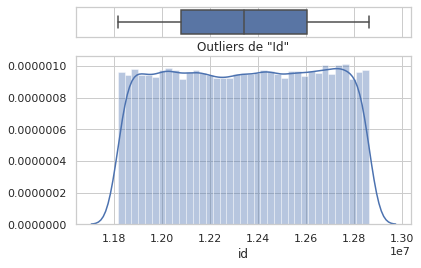

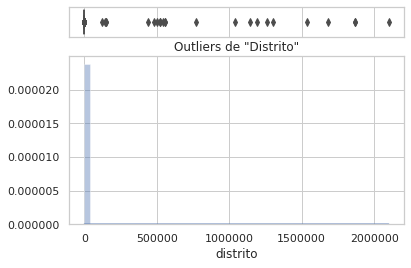

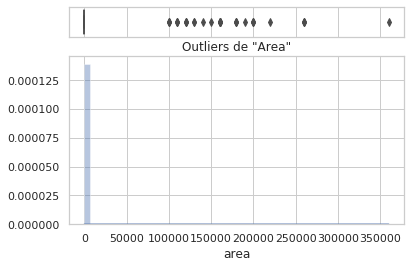

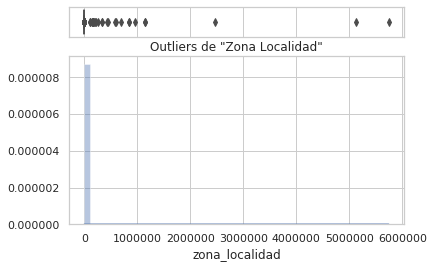

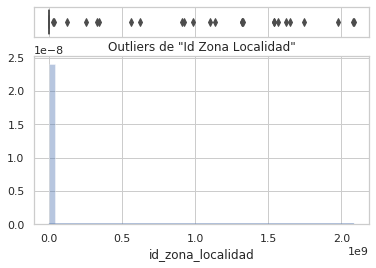

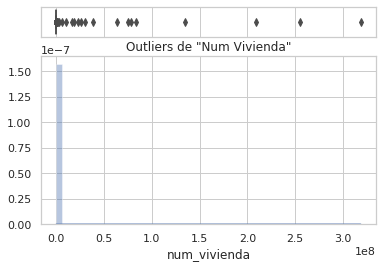

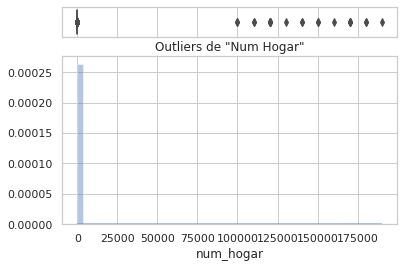

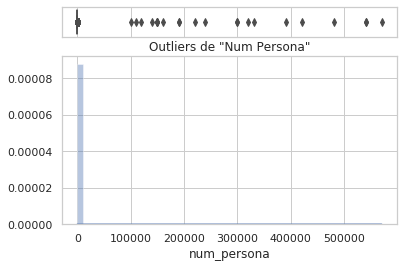

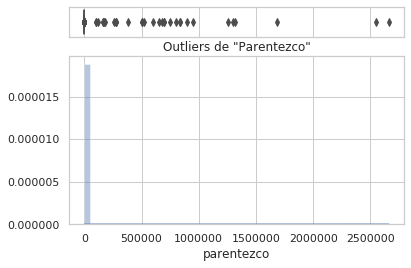

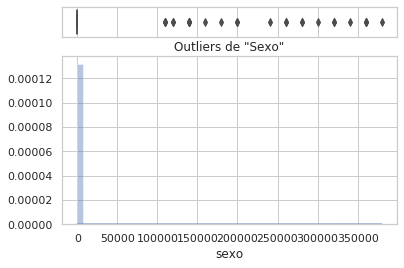

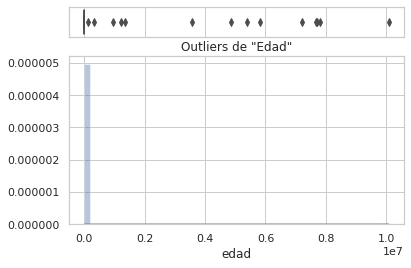

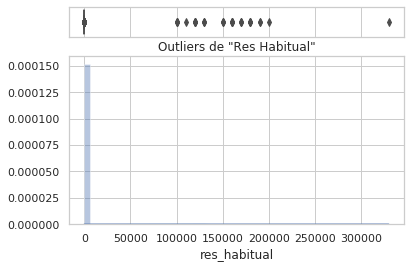

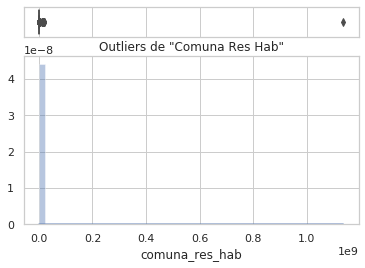

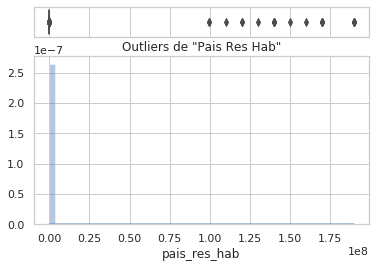

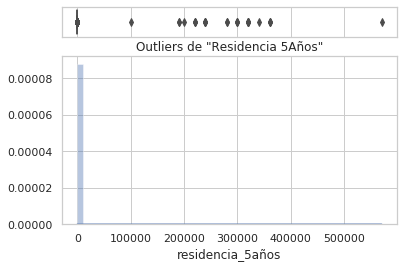

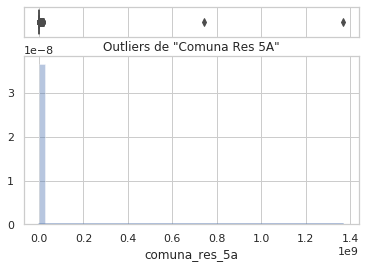

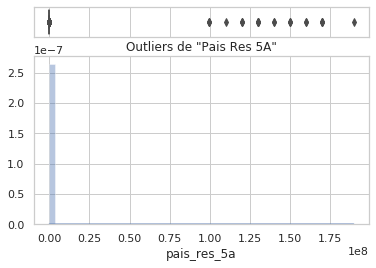

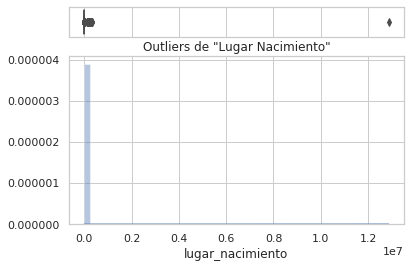

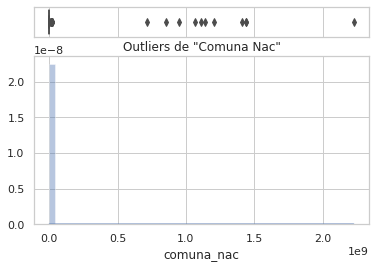

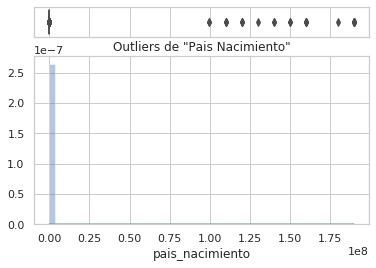

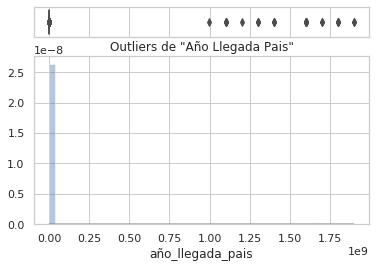

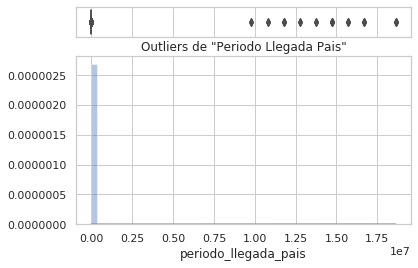

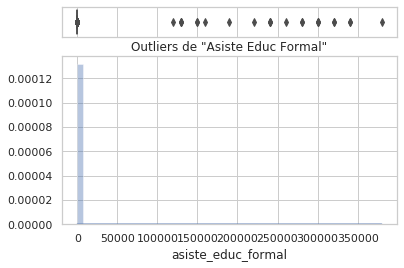

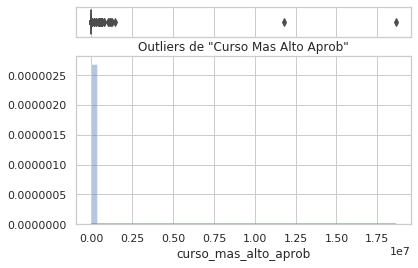

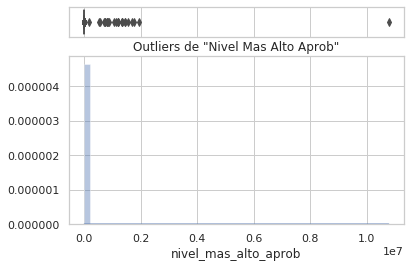

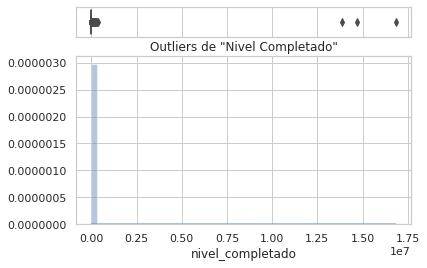

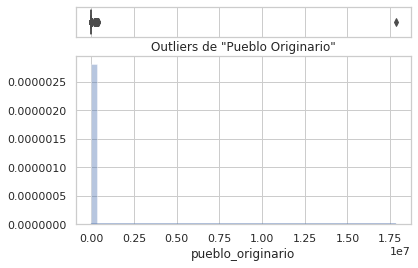

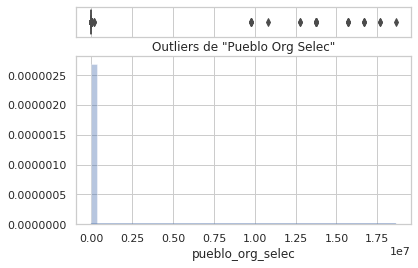

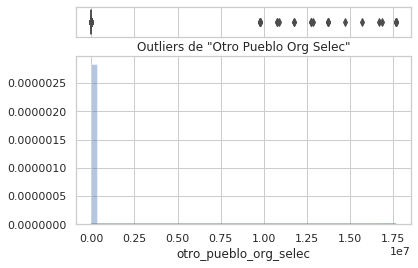

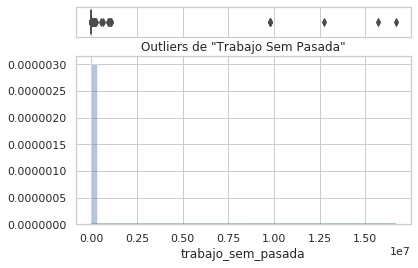


--
La columna "rama_act_econ" no se puede graficar.
--




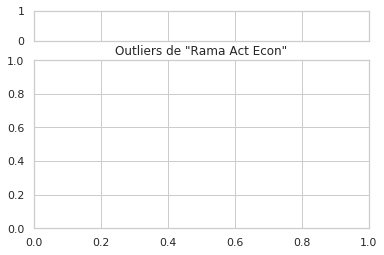

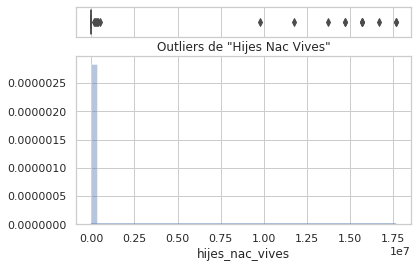

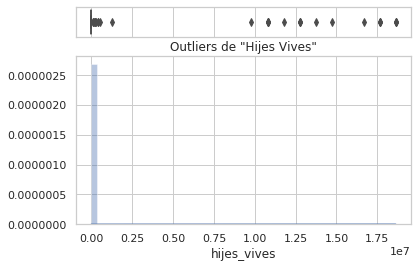

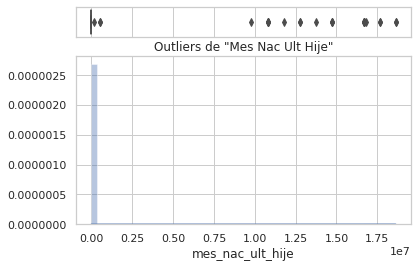

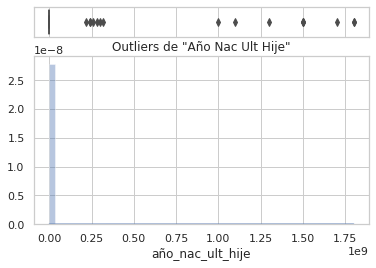

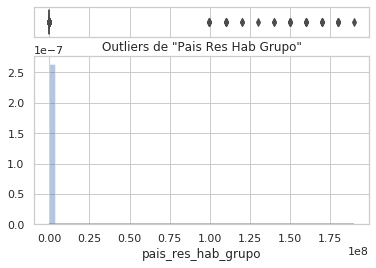

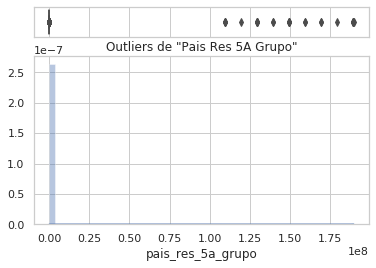

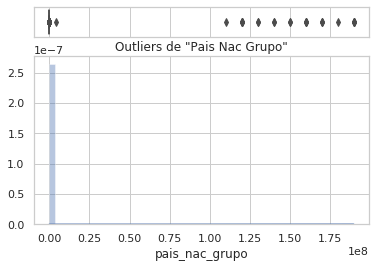

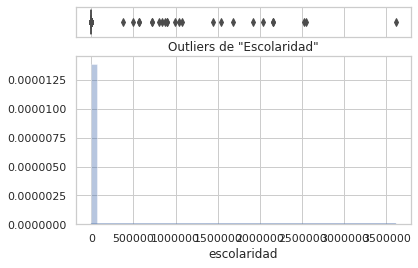

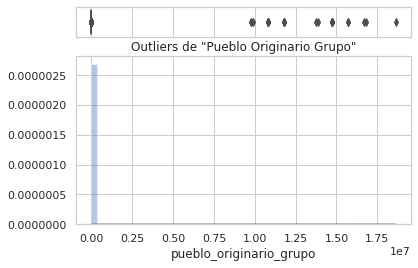

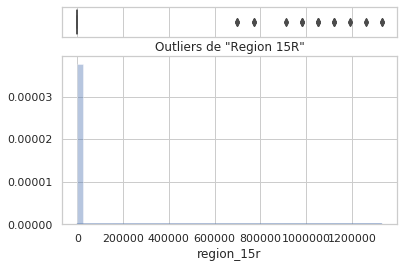

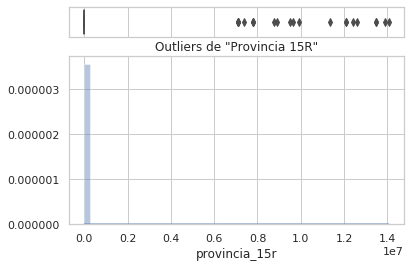

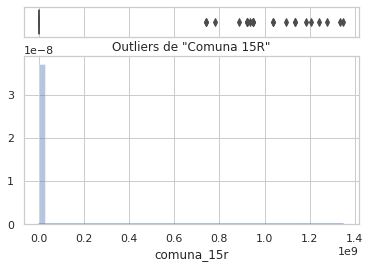

In [0]:
for col_name in df_region7.columns:
  try:
    outliers_graph(df_region7[col_name].dropna(), col_name)
  except:
    print(f'--\nLa columna "{col_name}" no se puede graficar.\n--\n\n')

In [0]:
df_region7.boxplot(figsize=(15,6), rot=90)

In [0]:
# list(df_region7.columns)

In [0]:
' formato (lim inf, lim sup, num fuera de rango a conservar)'

value_ranges_dic = {
    'area': (1, 2),
    'asiste_educ_formal': (1, 3, 98),
    'año_llegada_pais': (1950, 2017, 9998),
    'año_nac_ult_hije': (1890, 2017, 98),
    'comuna_15r': (1101, 15202),
    'comuna_nac': (997, 15202, 998),
    'comuna_nac_15r': (997, 15202, 998),
    'comuna_res_5a': (997, 15202, 998),
    'comuna_res_5a_15r': (997, 15202, 998),
    'comuna_res_hab': (997, 15202, 998),
    'comuna_res_hab_15r': (997, 15202, 998),
    'curso_mas_alto_aprob': (0, 8, 98),
    'distrito': (1, 99),
    'edad': (0, 100),
    'escolaridad': (0, 21, 98),
    'hijes_nac_vives': (0, 23, 98),
    'hijes_vives': (0, 23, 98),
    'id_zona_localidad': (1, 16053),
    'lugar_nacimiento': (1, 8, 98),
    'mes_nac_ult_hije': (1, 12, 98),
    'nivel_completado': (1, 2, 98),
    'nivel_mas_alto_aprob': (1, 14, 98),
    'num_hogar': (1, 36),
    'num_persona': (1, 9999),
    'num_vivienda': (1, 4296),
    'otro_pueblo_org_selec': (1, 97, 98),
    'pais_nac_grupo': (0, 997, 998),
    'pais_nacimiento': (0, 997, 998),
    'pais_res_5a': (0, 997, 998),
    'pais_res_5a_grupo': (0, 997, 998),
    'pais_res_hab': (0, 997, 998),
    'pais_res_hab_grupo': (0, 997, 998),
    'parentezco': (1, 19),
    'periodo_llegada_pais': (1, 4, 98),
    'provincia_15r': (11, 152),
    'pueblo_org_selec': (1, 10, 98),
    'pueblo_originario': (1, 2, 98),
    'pueblo_originario_grupo': (1, 10, 98),
    'region_15r': (1, 15),
    'res_habitual': (1, 4, 98),
    'residencia_5años': (1, 9, 98),
    'sexo': (1, 2),
    'trabajo_sem_pasada': (1, 8, 98),
    'zona_localidad': (1, 999)}



# value_ranges_dic = {
#     'DC':          (1,99),
#     'AREA':        (1,2),
#     'ZC_LOC':      (1,999),
#     'ID_ZONA_LOC': (1,16053),
#     'NVIV':        (1,4296),
#     'NHOGAR':      (1,36),
#     'PERSONAN':    (1,9999),
#     'P07':         (1,19),
#     'P08':         (1,2),
#     'P09':         (0,100),
#     'P10':         (1,4,98),
#     'P10COMUNA':   (997,15202,998),
#     'P10PAIS':     (0,997,998),
#     'P11':         (1,9,98),
#     'P11COMUNA':   (997,15202,998),
#     'P11PAIS':     (0,997,998),
#     'P12':         (1,8,98),
#     'P12COMUNA':   (997,15202,998),
#     'P12PAIS':     (0,997,998),
#     'P12A_LLEGADA':(1950,2017,9998),
#     'P12A_TRAMO':  (1,4,98),
#     'P13':         (1,3,98),
#     'P14':         (0,8,98),
#     'P15':         (1,14,98),
#     'P15A':        (1,2,98),
#     'P16':         (1,2,98),
#     'P16A':        (1,10,98),
#     'P16A_OTRO':   (1,97,98),
#     'P17':         (1,8,98),
#     'P19':         (0,23,98),
#     'P20':         (0,23,98),
#     'P21M':        (1,12,98),
#     'P21A':        (1890,2017,98),
#     'P10PAIS_GRUPO': (0,997,998),
#     'P11PAIS_GRUPO': (0,997,998),
#     'P12PAIS_GRUPO': (0,997,998),
#     'ESCOLARIDAD':   (0,21,98),
#     'P16A_GRUPO':    (1,10,98),
#     'REGION_15R':    (1,15),
#     'PROVINCIA_15R': (11,152),
#     'COMUNA_15R':    (1101,15202),
#     'P10COMUNA_15R': (997,15202,998),
#     'P11COMUNA_15R': (997,15202,998),
#     'P12COMUNA_15R': (997,15202,998)
# }

alpha = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p',
         'q','r','s','t','u','v','w','x','y','z']


In [0]:
# # Para crear de nuevo el diccionario que había sido creado con los nombres 
# # antiguos d elas variables:

# org_names = [col.org_name for col in info_region7.columns]
# new_names = [col.name for col in info_region7.columns]
# names_dic = dict(zip(org_names, new_names))

# equivalent_new_names = [names_dic[x] for x in value_ranges_dic.keys()]
# range_values = value_ranges_dic.values()
# dict(zip(equivalent_new_names, range_values))

In [0]:
def letter_to_num(l):
  if isinstance(l,str):
    if l == '98':
      return 98
    elif l.lower() in alpha:
      return alpha.index(l.lower().strip()) + 1
    return np.nan
  return l


In [0]:
# Se mofica la columna con letraspor números que represeten esas categorías:

if df_region7.rama_act_econ.dtype == 'object':
  df_region7.rama_act_econ = [letter_to_num(x) for x in df_region7.rama_act_econ]
  df_region7.rama_act_econ.describe()

if df_all_region7.rama_act_econ.dtype == 'object':
  df_all_region7.rama_act_econ = [letter_to_num(x) for x in df_all_region7.rama_act_econ]
  df_all_region7.rama_act_econ.describe()

In [0]:
# def change_values(value, *args):
#   # Si es un número fuera de rango:
#   if isinstance(value, int) or isinstance(value, float):
#     if len(args) == 3 and (not value in range(args[0], args[1]+1)):
#       if value != args[2]:
#         # Se remplaza por nan:
#         return np.nan
#   # Si el valor es nulo o está dentro del rango solo se retorna:
#   return value 
  

In [0]:
def change_values(value, *args):
  # Si es un número fuera de rango:
  if not value in range(args[0], args[1]+1):
    # El número es distinto al que indica "no aplica":
    if len(args) == 3:
      if value != args[2]:
        return np.nan
    # No hay números aceptados que estén fuera del rango:
    else:
      return np.nan
  # Si el valor es nulo o está dentro del rango o es otro valor aceptado,
  # solo se retorna:
  return value 

In [0]:
len(df_region7.sexo.unique())

In [0]:
# # Si no se han eliminado los outliers:
# if len(df_region7.sexo.unique()) > 3:

#   print('-'*100, '\n\nELIMINACIÓN DE OUTLIERS Y ASIGNACIÓN DE NULOS\n', 
#           '(paciencia, tarda un poco...)\n\n','-'*100, '\n')
#   # Se revisa cada columna en el diccionario:
#   for col_name in value_ranges_dic:
#     print(f'Trabajando con la columna {col_name}')
#     print('\tLa columna tiene {} valores únicos.\n\tProcesando...'\
#           .format(len(df_region7[col_name].unique())))
#     # Se determina si el valor está el el rango correcto o se cambia por nan:
#     df_region7[col_name] = [change_values(x, *value_ranges_dic[col_name]) \
#                             for x in df_region7[col_name]]
#     print('\tLa columna tiene {} valores únicos.\n'\
#         .format(len(df_region7[col_name].unique())))
#   print('\n\nTerminado!')
# else:
#   print('Los outliers ya habían sido eliminados')

# Si no se han eliminado los outliers:
if len(df_region7.sexo.unique()) > 3:

  print('-'*100, '\n\nELIMINACIÓN DE OUTLIERS Y ASIGNACIÓN DE NULOS\n', 
          '(paciencia, tarda un poco...)\n\n','-'*100, '\n')
  # Se revisa cada columna en el diccionario:
  for col_name in value_ranges_dic:
    print(f'Trabajando con la columna {col_name}')
    # print('\tLa columna tiene {} valores únicos.\n\tProcesando...'\
    #       .format(len(df_region7[col_name].unique())))
    # Se determina si el valor está el el rango correcto o se cambia por nan:
    df_region7[col_name] = [change_values(x, *value_ranges_dic[col_name]) \
                            for x in df_region7[col_name]]
    # print('\tLa columna tiene {} valores únicos.\n'\
    #     .format(len(df_region7[col_name].unique())))
  print('\n\nTerminado!')
else:
  print('Los outliers ya habían sido eliminados')

In [0]:
df_region7.sexo.describe()

In [0]:
print('Cantidad de nulos:')
sum(df_region7.sexo.isna())

In [0]:
null_graph(df_region7, 'Nulos Séptima Región')

In [0]:
def nan_rows_count(df):
  nan_rows = len(df.index[df.isnull().all(1)])
  print(f'Hay {nan_rows} filas con todos sus valores nulos.')

In [0]:
nan_rows_count(df_region7)

### 5) Separar Columnas con Varias Variables

Procese las columnas que contengan más de una variable en sus registros. Indique qué columnas son y qué variables contiene. Sepárelas indicando paso a paso cuál fue el proceso que utilizó para la limpieza de estas variables.


In [0]:
def get_territory(value, pos):
  '''
  Receives the text than contains the region, the province and the commune.
  Returns the integer of the  given position corresponding territory.
  '''
  if isinstance(value, str):
    return int(value.split('_')[pos])
  return value

if hasattr(df_region7, 'region_provincia_comuna'):
  # Se separa la columna region_provincia_comuna en 3 columnas:
  df_region7['region'] = [get_territory(x,0) for x in df_region7.region_provincia_comuna]
  df_region7['provincia'] = [get_territory(x,1) for x in df_region7.region_provincia_comuna]
  df_region7['comuna'] = [get_territory(x,2) for x in df_region7.region_provincia_comuna]
  # Se elimina la columna original:
  df_region7.drop('region_provincia_comuna', axis='columns', inplace=True)
  print('Se crearon las columnas region, provincia y comuna')
else:
  print('Las columnas region, provincia y comuna ya se encontraban creadas')

### 6) Identificar Tipos de Variables de las Columnas

Indique qué variables son categóricas o numéricas. Una vez identificadas, proceda a la conversión del tipo de variables según la clasificación que ud haya realizado. Luego de ello, recodifique las variables con nombres autocontenidos.


In [0]:
categorical = ', '.join(set(map(lambda x: x.name,info_region7\
                                .categorical_columns)))
numeric = ', '.join(set(map(lambda x: x.name,info_region7.numeric_columns)))

print(f'Las columnas con variables categóricas son:\n{categorical}')
print()
print(f'Las columnas con variables numéricas son:\n{numeric}')

**COMENTARIOS Y ANÁLISIS**

Gracias a la librería que creé, el proceso de renombrar columnas y establecer tipos de variables se realiza al inicio,en la carga de datos.

## Parte 4 -  Análisis Exploratorio con Todos los Datos de la Región


### 7) Tratamineto Inicial a Nuevos Datos
Cargue el nuevo set de datos. Aplique el mismo protocolo de tratamiento de datos perdidos, anómalos y outliers de las secciones anteriores. También cree las mismas columnas que haya creado en los set anteriores.

In [0]:
# # Si no se han eliminado los outliers:
# if len(df_all_region7.año_nac_ult_hije.unique()) > 84:
#   print('-'*100, '\n\nELIMINACIÓN DE OUTLIERS Y ASIGNACIÓN DE NULOS\n', 
#           '(paciencia, tarda un poco...)\n\n','-'*100, '\n')
#   # Se revisa cada columna en el diccionario:
#   for col_name in value_ranges_dic:
#     print(f'Trabajando con la columna {col_name}')
#     print('\tLa columna tiene {} valores únicos.\n\tProcesando...'\
#           .format(len(df_all_region7[col_name].unique())))
#     # Se determina si el valor está el el rango correcto o se cambia por nan:
#     df_all_region7[col_name] = [change_values(x, *value_ranges_dic[col_name]) \
#                             for x in df_all_region7[col_name]]
#     print('\tLa columna tiene {} valores únicos.\n'\
#         .format(len(df_all_region7[col_name].unique())))
#   print('\n\nTerminado!')
# else:
#   print('Los outliers ya habían sido eliminados')


# Si no se han eliminado los outliers:
if len(df_all_region7.año_nac_ult_hije.unique()) > 84:
  print('-'*100, '\n\nELIMINACIÓN DE OUTLIERS Y ASIGNACIÓN DE NULOS\n', 
          '(paciencia, tarda un poco...)\n\n','-'*100, '\n')
  # Se revisa cada columna en el diccionario:
  for col_name in value_ranges_dic:
    print(f'Trabajando con la columna {col_name}')
    # print('\tLa columna tiene {} valores únicos.\n\tProcesando...'\
          # .format(len(df_all_region7[col_name].unique())))
    # Se determina si el valor está el el rango correcto o se cambia por nan:
    df_all_region7[col_name] = [change_values(x, *value_ranges_dic[col_name]) \
                            for x in df_all_region7[col_name]]
    # print('\tLa columna tiene {} valores únicos.\n'\
    #     .format(len(df_all_region7[col_name].unique())))
  print('\n\nTerminado!')
else:
  print('Los outliers ya habían sido eliminados')

In [0]:
nan_rows_count(df_all_region7)

### 8) Análisis, Construcción de Rangos y Binarización

Genere un análisis acabado para los siguientes temas que se desprenden del CENSO 2017. A modo de ejemplo, puede utilizar alguna de las siguientes variables de interés: Fecundidad, Pueblos indígenas y originarios, Educación, Migración, o rama de actividad económica.

Se requiere que realicen al menos dos “binning” o construcción de rangos en torno a los datos entregados. Hint: Puede apoyarse de función pd.cut. Junto a lo anterior, también se requiere de al menos dos binarizaciones de variables.

Para cada concepto solicitado deberá adjuntar las tablas y gráficos pertinentes junto a las conclusiones que se desprendan del análisis realizado por ud. Para graficar, puede utilizar todas las herramientas vistas en el transcurso del programa (matplotlib y seaborn). Se considerará si el gráfico seleccionado es acorde con el análisis que se presenta además de la creación y utilización de funciones para poder graficar.

En este punto se requerirá de al menos 5 análisis concernientes a los datos. Es decir, no bastará con generar los gráficos, sino que se debe justificar la pertinencia del mismo, y extraer conclusiones relevantes y no evidentes de los mismos. Si se presenta un gráfico que no aporta valor al análisis, este NO será contabilizado.

#### 8.1) Binning

In [0]:
# Rangos para las edades:
bins = pd.IntervalIndex.from_tuples([(-1, 20), (20, 40), (40, 60), (60,80), 
                                     (80,100)])
se_age_intervals = pd.cut(df_all_region7.edad, bins)

# Rangos para la escolaridad:
bins = pd.IntervalIndex.from_tuples([(-1, 4), (4, 8), (8, 12), (12,16), 
                                     (16,21)])
se_scholarship_intervals = pd.cut(df_all_region7.escolaridad, bins)

# Rangos para los años de llegada:
bins = pd.IntervalIndex.from_tuples([(1949, 1960), (1960, 1970), (1970, 1980), 
                                     (1980,1990), (1990,2000), (2000,2010), 
                                     (2010, 2017)])
se_arriveyears_intervals = pd.cut(df_all_region7.año_llegada_pais, bins)

In [0]:
# Creación de las columnas:
df_all_region7['rango_edad'] = se_age_intervals
df_all_region7['rango_escolaridad'] = se_scholarship_intervals
df_all_region7['rango_año_llegada'] = se_arriveyears_intervals
df_all_region7.head(3)

#### 8.2) Binarización

In [0]:
# Si no se ha hecho la binarización:
if not ('rango_año_llegada_(1949, 1960]' in []): #df_all_region7.columns):
  df_bin_all_region7 = pd.get_dummies(df_all_region7)
  to_drop_cols = ['rango_año_llegada_(2010, 2017]', 'rango_edad_(-1, 20]', 
                  'rango_escolaridad_(-1, 4]']
  df_bin_all_region7.drop(to_drop_cols, axis='columns', inplace=True)
# Si la binarización ya fue hecha:
else:
  print('La base de datos ya había sido binarizada antes.')

In [0]:
df_bin_all_region7.head(3)

#### 8.3) Gráficos y Análisis

##### 8.3.1) Gráfico Llegada de Inmigantes

In [0]:
df_all_region7.groupby('rango_año_llegada')['id'].count().plot(kind= 'bar')
plt.title('Llegada de Inmigrantes\n', size=20)
plt.show()

##### 8.3.2) Gráfico de Escolaridad Promedio de Inmigrantes

In [0]:
df_all_region7.groupby(['rango_año_llegada'])['escolaridad'].mean()\
.plot(kind='bar')
plt.title('Escolaridad Promedio de los Inmigrantes\n', size=20)
plt.hlines(12, -1, 7)
plt.legend()
plt.show()

##### 8.3.3) 

In [0]:
immigrants_scholarship = df_bin_all_region7.copy()
# Se añaden los rangos de esclaridad:
immigrants_scholarship['rango_escolaridad'] = \
df_all_region7['rango_escolaridad']
# Se agrupa y se cuentan los inmigrantes por rango de escolaridad.
immigrants_scholarship = immigrants_scholarship\
[df_bin_all_region7['rango_año_llegada_(2000, 2010]'] == 1]\
.groupby('rango_escolaridad')['id'].count()

# Cálculo de porcentajes:
per_immigrants_scholarship = immigrants_scholarship*100 / \
immigrants_scholarship.sum()

# Creación del gráfico:
per_immigrants_scholarship.plot(kind='bar')
plt.title('Porcentaje Escolaridad Inmigrantes Última Década\n', size=20)
plt.hlines(44.92, 2.7,4.3, color='r', linewidth=3)
plt.hlines(55.08, -0.3,2.3, color='r', linewidth=3)
plt.vlines(2.5, 0, 60)


plt.show()

##### 8.3.4) Gráfico Escolaridad Promedio de Inmigrantes por Grupo País de Origen en la Última Década

In [0]:
# Se filtran inmigrantes de la última década:
immigrants_last_dec = df_all_region7\
[df_all_region7['rango_año_llegada'] == pd.Interval(2010, 2017)]\

immigrants_last_dec.groupby('pais_nac_grupo')['escolaridad'].mean()\
.sort_values().plot.barh(figsize=(5, 10))
plt.title('Escolaridad Promedio de Inmigrantes por Grupo País de Origen \nen la Última Década\n',
          size=20)
plt.vlines(12, -1, 19)
plt.show()


##### 8.3.5) 

## Parte 5 -  Herramientas de Análisis

### 9) Estudio Correlacional

Desarrolle un estudio correlacional para los dos set de datos. Destaque los coeficientes de Pearson que para ud sean significativos. En base esto, realice un análisis bivariado entre los atributos que presentan una alta correlación. Si es necesario, recodifique las variables que utilizará para la construcción de la matriz (binarizar). Utilice gráficos de dispersión y adjunte un análisis claro que se desprenda de este.


In [0]:
correlation_map(df_all_region7, 'Censo Región del Maule (7ma)', annot=False)

In [0]:
correlation_map(df_bin_all_region7, 'Censo Región del Maule (7ma)', annot=False)

In [0]:
def bounded_correlation_map(start, end):
  correlation_map(df_bin_all_region7.loc[:,start:end], 'Censo Región del Maule (7ma)')

In [0]:
corr_ranges = (('residencia_5años','año_llegada_pais'),
               ('asiste_educ_formal','otro_pueblo_org_selec'),
               ('rama_act_econ','año_nac_ult_hije'),
               ('region_15r','comuna_15r'),
               ('parentezco','hijes_nac_vives'),
               )
for tuple_ranges in corr_ranges:
  bounded_correlation_map(*tuple_ranges)

### 10) Prueba T

Prueba (Test) t de comparación de medias para dos muestras independientes: En proyectos anteriores ya hemos utilizado de forma implícita este test, a la hora de evaluar la significancia de variables en un modelo de regresión lineal. Estudie los usos más comunes de este test.

A partir de lo anterior, elija al menos 3 variables donde utilizar este test, comparando las medias regionales (con el set de datos completo) y nacionales (muestreo de 50.000 datos) que resulten de su interés. Concluya en torno al rechazo o no del test, y cual es la implicancia de ello para el análisis generado.



In [0]:
# t, p = stats.ttest_ind(df_chile.escolaridad.values, df_all_region7.escolaridad.values)
# print(t, p)

#### 10.1) Prueba T para Escolaridad

In [0]:
# Aplicación del Test T a la colmna escolaridad:
t,p = stats.ttest_ind(df_all_region7.escolaridad, df_chile.escolaridad, 
                      equal_var=False, nan_policy='omit')
print(t,'\n', p)

In [0]:
# np.random.choice(df_all_region7.escolaridad, 50000)

#### 10.2) Prueba T para ...

#### 10.3) Prueba T para ...

### 11) Bonus: Regresión Lineal o Análisis Factorial: 

Investigue y proponga la realización de alguno de estos dos análisis, en función de su pertinencia para estos casos. También puede investigar en torno a la confección de clusters para agrupar a los datos.


## Parte 6 -  Modelos de Almacenamiento y Cierre del Proyecto

El modelamiento de datos dimensional, conlleva una técnica que facilita la comprensión de la base de datos, haciéndola intuitiva para usuarios no expertos, y es comúnmente utilizada para implementar en los Data Warehouse. Esta técnica goza de una gran aceptación y, a menudo, es elegida como la preferida para representar datos analíticos por cumplir simultáneamente con los siguientes requerimientos:

- Dispone y estructura los datos de manera comprensibles para el usuario de negocio.
- Genera un alto rendimiento en las 
búsquedas desde la capa de reporte.

Existen dos estructuras para el modelamiento dimensional y que son las más frecuentes: Modelo Estrella y Modelo Copo de Nieve. Para información más detallada sobre estas estructuras puede ingresar al siguiente link:
https://blog.bi-geek.com/modelo-dimensional/

Para efectos prácticos, en las próximas preguntas solo utilizaremos la estructura Estrella, donde se trabajará con un set de datos total de cada región y donde se aplicará esta técnica de modelamiento.


### 12) Modelo Estrella

En función de lo anterior, construya a partir de su DataFrame regional, nuevos Dataframe que contengan la misma información, bajo el esquema y lógica del modelo Estrella. Como propuesta, separe las preguntas según temática que responden.

### 13) Exportar los Datos a Archivos CSV

Exporte cada una de las tablas generadas en su respectivo archivo csv, y cree un archivo readme.txt donde se resuma la información que contiene cada nuevo DataFrame, indicando llaves primarias y foráneas en cada caso, y la forma en que se conectaría cada tabla o DataFrame. Estas tablas deben incluir todas las columnas creadas, incluidas aquellas creadas a conveniencia.

### 14) Crear Base de Datos en PostgreSQL

Cree una nueva Base de Datos, y conéctese a ella vía Python. Cargue cada uno de los archivos csv como una tabla, indicando llaves primarias y foráneas en cada caso. 

In [0]:
# execute_querys(<queries de creación de tablas y carga de datos desde csv>)

### 15) Diagrama Entidad Relación

Revise la BBDD en Dbeaver, en particular el diagrama ER (Entidad Relación) y exporte la imagen que el programa muestra, en formato PNG. Comente al respecto.

## Condiciones de Entrega

Finalmente, no olvidar que la entrega del notebook debe ser como un informe autocontenido, por lo cual el orden del mismo debe ser el adecuado, simplificando la lectura y depuración del código. 


Formato de entrega:

Entregar un archivo .ipynb con todo el código requerido para dar respuestas a las preguntas. Este archivo debe correr desde principio a fin. De no hacerlo, se evaluará hasta la última línea que se ejecutó. Se pide encarecidamente revisar antes de enviar.
Los archivos csv que se solicitan en el enunciado (parte 13).
El archivo PNG con el modelo ER (parte 15).

Ojo: Este proyecto incluye presentación. Sin perjuicio de lo anterior, el notebook debe ser autocontenido, es decir, debe explicar de forma clara cada uno de los pasos de forma ordenada, contando con un relato claro que nos permita observar tanto el código, como los análisis y conclusiones de su trabajo. Para un mejor orden del notebook y buenas prácticas, por favor guiarse por lo explicado en la Parte 1.

La presentación en sí misma se deberá entregar el día previo a la presentación del día Jueves 16 de Enero.

Plazos de entrega:

Viernes 10 de Enero. 23:59 hrs

